## Introduction: 

Market segmentation is a process of dividing a heterogeneous market into relatively more homogenous segments based on certain parameters like geographic, demographic, psychographic, and behavioural. It is the activity of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers (known as segments) based on some type of shared characteristics.

In dividing or segmenting markets, researchers typically look for common characteristics such as shared needs, common interests, similar lifestyles, or even similar demographic profiles. The overall aim of segmentation is to identify high yield segments – that is, those segments that are likely to be the most profitable or that have growth potential – so that these can be selected for special attention (i.e. become target markets). Many different ways to segment a market have been identified. Business-to-business (B2B) sellers might segment the market into different types of businesses or countries. While business-to-consumer (B2C) sellers might segment the market into demographic segments, lifestyle segments, behavioural segments, or any other meaningful segment.

Market segmentation assumes that different market segments require different marketing programs – that is, different offers, prices, promotion, distribution, or some combination of marketing variables. Market segmentation is not only designed to identify the most profitable segments, but also to develop profiles of key segments in order to better understand their needs and purchase motivations. Insights from segmentation analysis are subsequently used to support marketing strategy development and planning. Many marketers use the S-T-P approach; Segmentation → Targeting → Positioning to provide the framework for marketing planning objectives. That is, a market is segmented, one or more segments are selected for targeting, and products or services are positioned in a way that resonates with the selected target market or markets.

In this notebook it is aimed to make segmentation according to the customer information in the dataset. 

## Content:

- <a href='#1.'> 1. Importing Libraries</a>
- <a href='#2.'> 2. Loading and Checking Data</a>
- <a href='#3.'> 3. Variable Description</a>
- <a href='#4.'> 4. Data Analysis</a>
- <a href='#5.'> 5. Preprocessing</a>
- <a href='#6.'> 6. Modelling</a>

## <a id='1.'> 1. Importing Libraries</a> 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <a id='2.'> 2. Loading and Checking Data</a> 

In [2]:
# Loading data
raw_data = pd.read_csv("../input/customer-segmentation-tutorial-in-python/Mall_Customers.csv")
raw_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Checking the shape of dataset
raw_data.shape

(200, 5)

In [4]:
# Checking info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Checking the statistical summary of dataset
raw_data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## <a id='3.'> 3. Variable Description</a> 

There are 5 independent variables.
* CustomerID: ID number of the customers (categorical) 
* Gender: Gender of the customer (categorical)              
* Age: Age of the customer (numerical)                    
* Annual Income(k$): Annual income of the customer (numerical)  
* Spending Score(1-100): Spending score of the customers (numerical)

dtypes: int64(4), object(1)

## <a id='4.'> 4. Data Analysis</a>

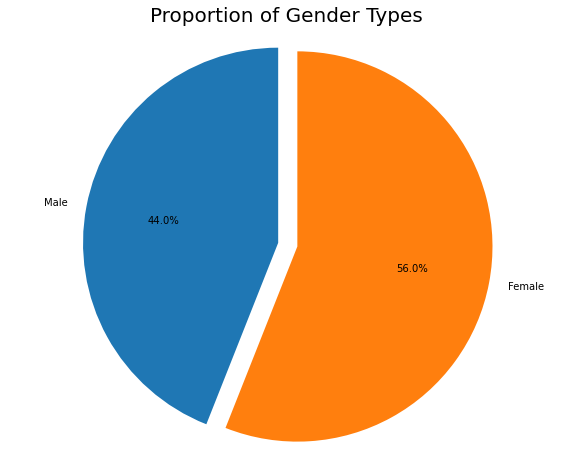

In [6]:
# Checking gender proportion
labels = 'Male', 'Female'
sizes = [raw_data.Gender[raw_data['Gender']=="Male"].count(), raw_data.Gender[raw_data['Gender']=="Female"].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.title("Proportion of Gender Types", size = 20)
plt.show()

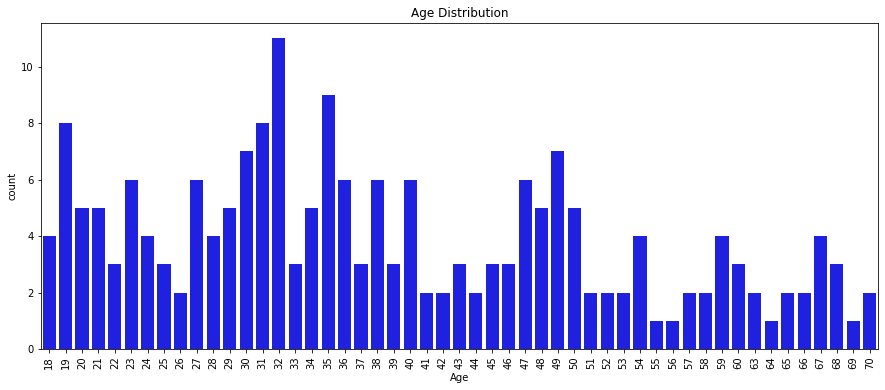

In [7]:
# Checking "Age" distribution
plt.subplots(figsize=(15,6))
sns.countplot('Age',data=raw_data, color="blue")
plt.xticks(rotation=90)
plt.title('Age Distribution')
plt.show()

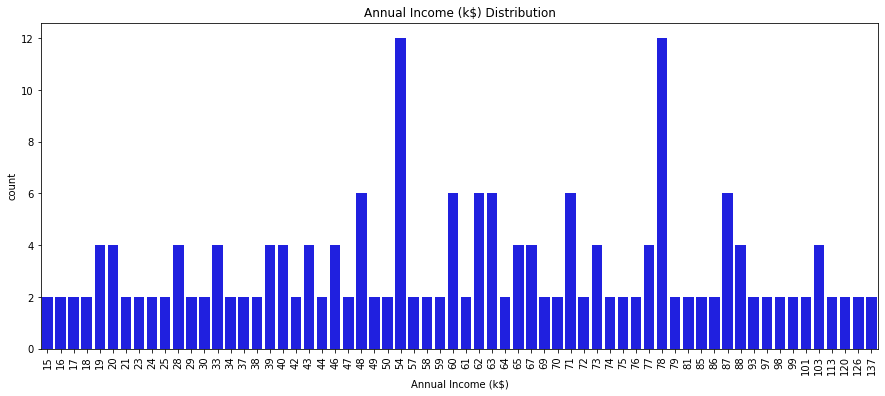

In [8]:
# Checking "Annual Income" distribution
plt.subplots(figsize=(15,6))
sns.countplot('Annual Income (k$)',data=raw_data, color="blue")
plt.xticks(rotation=90)
plt.title('Annual Income (k$) Distribution')
plt.show()

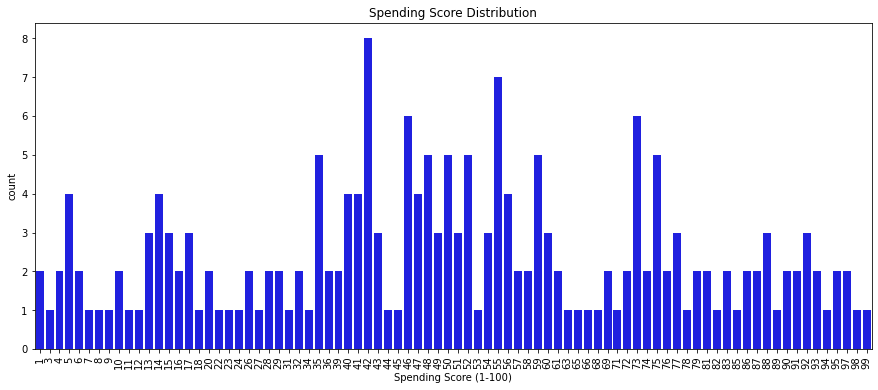

In [9]:
# Checking "Spending Score" distribution
plt.subplots(figsize=(15,6))
sns.countplot('Spending Score (1-100)',data=raw_data, color="blue")
plt.xticks(rotation=90)
plt.title('Spending Score Distribution')
plt.show()

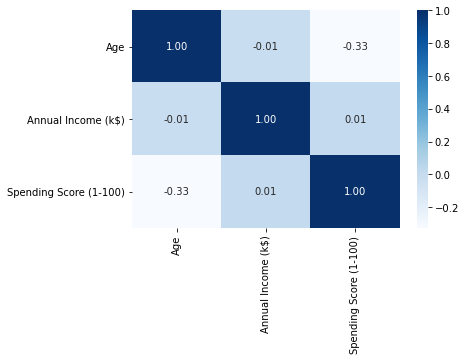

In [10]:
# Checking correlation between variables
list1 =["Age", "Annual Income (k$)", "Spending Score (1-100)"]
sns.heatmap(raw_data[list1].corr(), annot = True, fmt = ".2f", cmap="Blues")
plt.show()

## <a id='5.'> 5. Preprocessing</a>

In [11]:
# Creating a checkpoint
data = raw_data.copy()
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
# CustomerID variable is a number that is there to distinguish the individuals from one another, not to carry any numeric information.
# We should drop it. 
data = data.drop(["CustomerID"], axis = 1) 
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [13]:
# Data transformation
data["Gender"] = data["Gender"].map({"Male":0, "Female":1})
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [14]:
# Outlier detection
def detect_outlier(df, features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1)
    
    return multiple_outliers

In [15]:
from collections import Counter
data.loc[detect_outlier(data,["Age", "Annual Income (k$)", "Spending Score (1-100)"])]

,Gender,Age,Annual Income (k$),Spending Score (1-100)


We have no outliers.

In [16]:
# Missing Values
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

We have no missing values.

In [17]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [18]:
#We will make segmentation considering only 2 features (Annual income and Spending Score)
df = data.iloc[:, [2,3]].values

## <a id='6.'> 6. Modelling</a>

In [19]:
from sklearn.cluster import KMeans
wcss = []

In [20]:
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

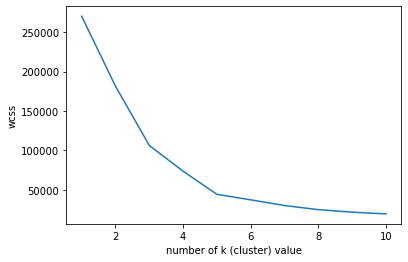

In [21]:
# To define the sengent number we use the elbow method.
plt.plot(range(1,11),wcss)
plt.xlabel("number of k (cluster) value")
plt.ylabel("wcss")
plt.show()

In [22]:
# From graph above we see that elbow method indicates five clusters.
kmeans2 = KMeans(n_clusters = 5)
clusters = kmeans2.fit_predict(df)
clusters

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

In [23]:
# Adding cluster information to the dataset
data["label"] = clusters

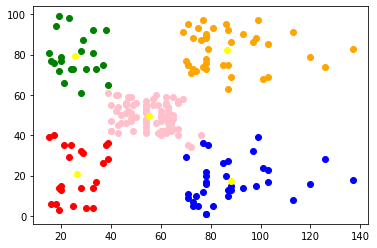

In [24]:
# Visualizing the clusters
plt.scatter(data["Annual Income (k$)"][data.label == 0],data["Spending Score (1-100)"][data.label == 0], color="red")
plt.scatter(data["Annual Income (k$)"][data.label == 1],data["Spending Score (1-100)"][data.label == 1], color="green")
plt.scatter(data["Annual Income (k$)"][data.label == 2],data["Spending Score (1-100)"][data.label == 2], color="blue")
plt.scatter(data["Annual Income (k$)"][data.label == 3],data["Spending Score (1-100)"][data.label == 3], color="orange")
plt.scatter(data["Annual Income (k$)"][data.label == 4],data["Spending Score (1-100)"][data.label == 4], color="pink")
plt.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1],color="yellow")
plt.show()